In [1]:
%mathplotlib notebook

UsageError: Line magic function `%mathplotlib` not found.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

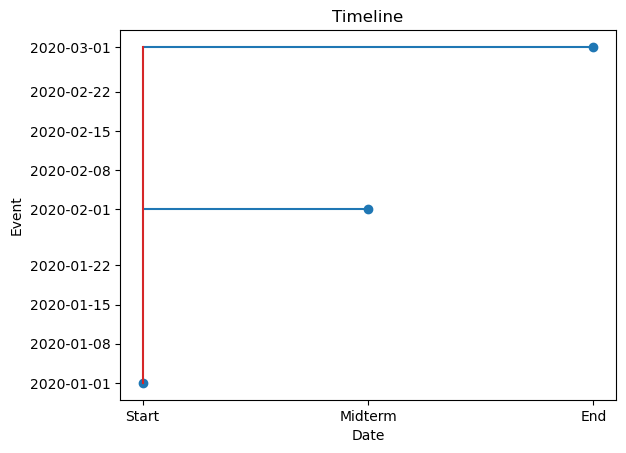

In [3]:
# Create some data
dates = [datetime.datetime(2020, 1, 1), datetime.datetime(2020, 2, 1), datetime.datetime(2020, 3, 1)]
labels = ["Start", "Midterm", "End"]

# Create the plot
plt.stem(dates, labels, orientation="horizontal")
plt.xlabel("Date")
plt.ylabel("Event")
plt.title("Timeline")
plt.show()

In [4]:
hate_crime_data = os.path.join('..', 'Resources', 'hate_crime.csv')

hateCrimedf = pd.read_csv(hate_crime_data)

hateCrimedf = hateCrimedf[hateCrimedf['data_year'] >= 2015]
hateCrimedf

hateCrimedf.drop(columns=[

    'pub_agency_unit',
    'state_name',
    'population_group_code',
    'adult_victim_count',
    'juvenile_victim_count',
    'adult_offender_count',
    'juvenile_offender_count',
    'location_name',
    'multiple_offense',
    'multiple_bias'

], inplace=True)

hateCrimedf.reset_index(drop=True)

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,division_name,region_name,population_group_description,incident_date,total_offender_count,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,bias_desc,victim_types
0,180579,2015,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",2015-03-28,0,Unknown,Not Specified,2,Destruction/Damage/Vandalism of Property,2.0,Anti-Arab,Individual
1,180580,2015,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",2015-11-20,1,American Indian or Alaska Native,Not Specified,1,Intimidation,1.0,Anti-Black or African American,Individual
2,180581,2015,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",2015-07-31,1,American Indian or Alaska Native,Not Specified,10,Intimidation,10.0,Anti-Black or African American,Individual
3,180582,2015,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",2015-06-11,0,Unknown,Not Specified,1,Arson,0.0,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Other
4,180583,2015,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",2015-08-03,1,White,Not Specified,1,Aggravated Assault,1.0,Anti-Black or African American,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66963,1473449,2022,WY0190200,Rock Springs,City,WY,Mountain,West,"Cities from 10,000 thru 24,999",2022-06-01,1,White,Hispanic or Latino,2,Simple Assault,2.0,Anti-White,Individual
66964,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Mountain,West,"Cities under 2,500",2022-09-19,1,White,Not Hispanic or Latino,1,Intimidation,1.0,Anti-Gay (Male),Individual
66965,1476554,2022,WY0190000,Sweetwater,County,WY,Mountain,West,"Non-MSA counties under 10,000",2022-11-08,2,White,Multiple,2,Simple Assault,2.0,Anti-Hispanic or Latino,Individual
66966,1476555,2022,WY0110100,Cheyenne,City,WY,Mountain,West,"Cities from 50,000 thru 99,999",2022-11-15,8,White,Not Hispanic or Latino,1,Intimidation,1.0,Anti-Black or African American,Individual


In [5]:

grouped_crime = hateCrimedf.groupby('data_year')
grouped_crime

hateCrimedf['incident_date'] = pd.to_datetime(hateCrimedf['incident_date'])
hateCrimedf.dtypes

incident_id                              int64
data_year                                int64
ori                                     object
pug_agency_name                         object
agency_type_name                        object
state_abbr                              object
division_name                           object
region_name                             object
population_group_description            object
incident_date                   datetime64[ns]
total_offender_count                     int64
offender_race                           object
offender_ethnicity                      object
victim_count                             int64
offense_name                            object
total_individual_victims               float64
bias_desc                               object
victim_types                            object
dtype: object

In [6]:
hateCrimedf['division_name'].value_counts()

division_name
Pacific               15657
Middle Atlantic       11986
East North Central     9252
South Atlantic         7892
Mountain               5228
New England            4956
West South Central     3937
West North Central     3913
East South Central     3421
Other                   705
U.S. Territories         21
Name: count, dtype: int64